### Import Python Libraries


In [1]:
# Standard library imports
from io import BytesIO

# Third-party library imports
import geopandas as gpd
from matplotlib import colors, colormaps
import matplotlib.pyplot as plt
from dateutil.parser import isoparse
from PIL import Image as pil_image
from ipfs_stac import client
import numpy as np


/usr/local/Caskroom/miniforge/base/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/cl/bvzbnrpj53b4lsrhv2f6h13w0000gn/T/ipykernel_3003/2539305394.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (

### Usage Example

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Standard library imports
from io import BytesIO

# Third-party library imports
import geopandas as gpd
from matplotlib import colors, colormaps
import matplotlib.pyplot as plt
from dateutil.parser import isoparse
from PIL import Image as pil_image
import numpy as np

# Import ipfs-stac library
from ipfs_stac import client

# Initialize client
my_client = client.Web3(stac_endpoint="http://ec2-54-172-212-55.compute-1.amazonaws.com/api/v1/pgstac/", local_gateway="127.0.0.1")

# Query STAC by bounding box and fetch a landsat scene
bbox = [-43.210297, -22.951625, -43.207670, -22.948875]
item = my_client.searchSTACByBox(bbox, "landsat-c2l1")[0]
properties = item.properties
print(f"This satellite image was taken by the {properties['platform']} platform on {isoparse(properties['datetime']):%c}. \n\
The image covers an area with a bounding box of {item.bbox}. \n\
The image has a resolution of {properties['proj:shape']} pixels and uses the EPSG:{properties['proj:epsg']} coordinate reference system. \n\
The percentage of cloud cover in the image is {properties['eo:cloud_cover']}% over the entire image.")

# View asset/band CIDs
red_band = my_client.getAssetFromItem(item, "red")
nir_band = my_client.getAssetFromItem(item, "nir08")

print(f"Red band CID: {red_band}")
print(f"NIR band CID: {nir_band}")

# Pin data to configured node
red_band.pin()
nir_band.pin()

This satellite image was taken by the LANDSAT_9 platform on Fri Apr 29 12:51:44 2022. 
The image covers an area with a bounding box of [-44.536830468027404, -24.159593378153613, -42.33239180014666, -22.069216157455493]. 
The image has a resolution of [7801, 7731] pixels and uses the EPSG:32623 coordinate reference system. 
The percentage of cloud cover in the image is 1.04% over the entire image.
✅  Fetching QmaRuJTn5mVb35FYsJt9md4mrFUT4BQPR47QszzVfwVxqY - 71212489/71212489 bytes
✅  Fetching QmWf3pSqKPGEMhe6mJkXkX1uvd5vfEXpqetTLqqqvkw7z3 - 76741034/76741034 bytes
Red band CID: QmaRuJTn5mVb35FYsJt9md4mrFUT4BQPR47QszzVfwVxqY
NIR band CID: QmWf3pSqKPGEMhe6mJkXkX1uvd5vfEXpqetTLqqqvkw7z3
Data pinned successfully
Data pinned successfully


### Explore our STAC Catalog with GeoPandas and the ipfs-stac packages
For demo purposes, we have populated the STAC server with a small subset of Landsat 9 imagery. In order to effortless work with STAC and IPFs, our team has developed the [ipfs-stac](https://github.com/easierdata/ipfs-stac) package which is included in the requirements.txt file.

Before running the following code cells, ensure you have started the IPFS daemon by either using the IPFS desktop application or running `ipfs daemon` in the terminal.

In [4]:
bbox = [-43.210297, -22.951625, -43.207670, -22.948875]
items = my_client.searchSTACByBox(bbox,"landsat-c2l1")


df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326")

df.explore()

### Fetch Landsat Scene From One of the 7 Wonders of the World
The following code connects to our STAC API instance and searches for Landsat 9 imagery by submitting a bounding box query to the STAC server. The STAC server returns a list of Landsat 9 scenes that intersect with the bounding box. Our STAC server only has ~10 scenes, so most bounding boxes will only return a single scene.

In [3]:
item = my_client.searchSTACByBox(bbox, "landsat-c2l1")[0]
properties = item.properties
print(f"This satellite image was taken by the {properties['platform']} platform on {isoparse(properties['datetime']):%c}. \n\
The image covers an area with a bounding box of {item.bbox}. \n\
The image has a resolution of {properties['proj:shape']} pixels and uses the EPSG:{properties['proj:epsg']} coordinate reference system. \n\
The percentage of cloud cover in the image is {properties['eo:cloud_cover']}% over the entire image.")
# Uncomment the line below to see the full metadata for the item
#item 

This satellite image was taken by the LANDSAT_9 platform on Wed Feb  2 09:53:39 2022. 
The image covers an area with a bounding box of [10.722394904433058, 40.69369269987787, 13.472045876637816, 42.80903201136925]. 
The image has a resolution of [8031, 7931] pixels and uses the EPSG:32633 coordinate reference system. 
The percentage of cloud cover in the image is 2.4% over the entire image.


### Fetch bands 4 and 5 from IPFS (Red and NIR)

In [4]:
red_band = my_client.getAssetFromItem(item, "red")
nir_band = my_client.getAssetFromItem(item, "nir08")

print(f"Red band CID: {red_band}")
print(f"NIR band CID: {nir_band}")

Fetching QmXyXkdvj7spdfyFTtdq6PGHo7QFK8YcJCQHeJC88CXwHa
Fetching QmcD4krqqBEN2KCtdebeUP9VQXjKxu9mJbDo8retBjbDEV
Red band CID: QmXyXkdvj7spdfyFTtdq6PGHo7QFK8YcJCQHeJC88CXwHa
NIR band CID: QmcD4krqqBEN2KCtdebeUP9VQXjKxu9mJbDo8retBjbDEV


### Download Assets from IPFS and transform the image an NP array
This could take awhile depending on your internet connection and the number of IPFS peers you are connected to.

In [5]:
red_band_np = red_band.to_np_ndarray()
nir_band_np = nir_band.to_np_ndarray()

### Calculate NDVI
Now, we can calculate the NDVI using the loaded numpy arrays. The forumula we are using for NDVI is straight from the [USGS website](https://www.usgs.gov/core-science-systems/nli/landsat/landsat-normalized-difference-vegetation-index?qt-science_support_page_related_con=0#qt-science_support_page_related_con). We will also add a small value to the denominator to avoid divide by zero errors because there is a chance that the red and NIR bands will have the same value in a given pixel.

In [6]:
eps = 0.0001 # Avoid divide by zero errors
ndvi = (nir_band_np - red_band_np) / (nir_band_np + red_band_np + eps)

### Plot NDVI
With the NDVI calculated, we can plot the NDVI image using matplotlib.

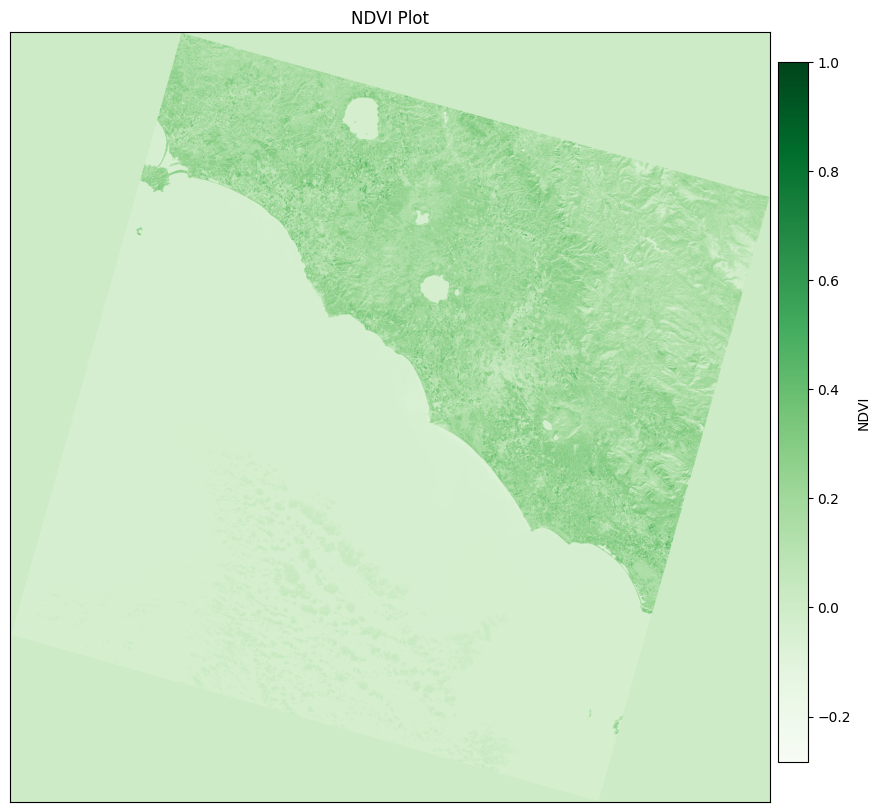

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

# Remove the axes
ax.set_xticks([])
ax.set_yticks([])

# Set the color map to the min and max values of NDVI
ndvi_min, ndvi_max = np.min(ndvi), np.max(ndvi)
norm = colors.Normalize(vmin=ndvi_min, vmax=ndvi_max)

# Use the normalization object for the image and the color map
green_color_map = colormaps["Greens"]
green_ndvi = green_color_map(norm(ndvi))

img = ax.imshow(green_ndvi)
ax.set_title("NDVI Plot")

cax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cb = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=green_color_map), cax=cax, orientation='vertical')
cb.set_label("NDVI")

plt.show()

## Data Pinning

In [13]:
red_band.pin()
nir_band.pin()

Data pinned successfully
Data pinned successfully


You can use the `client.pinned_list()` command to confirm that the two Landsat bands and the plot have been added to your IPFS node. By pinning the data, you have made it accessible to the IPFS network, allowing others to access it as well. By sharing this data on IPFS, you are contributing to the open and decentralized web, and making it easier for others to access and use this data. Perhaps the next person following this tutorial will obtain the data from your IPFS node!

In [ ]:
my_client.pinned_list()

## Footnotes
¹ The IPFS node may not actually be the closest node to you. But is simply the one that is most capable of serving the data. This is because IPFS nodes are not required to be online 24/7 and have various levels of bandwidth and storage capacity.